**豆瓣电影TOP250可视化**

https://github.com/Tobby-star/douban

In [6]:
import pandas as pd
from pyecharts import Boxplot

# 读取文件
# df = pd.read_csv('douban_top_250.csv', header=0, names=["quote", "score", "info", "title", "people"])
df_before = pd.read_csv('douban_top_250.csv', encoding = 'gb18030')

In [7]:
df_before.head()

,rank,title,link,director,actor,image_link,year,country,typ,score,people,words
0,1,肖申克的救赎,https://movie.douban.com/subject/1292052/,弗兰克·德拉邦特 Frank Darabont,蒂姆·罗宾斯 Tim Robbins /...,https://img3.doubanio.com/view/photo/s_ratio_p...,1994,美国,犯罪 剧情,9.6,1229537人评价,希望让人自由。
1,2,霸王别姬,https://movie.douban.com/subject/1291546/,陈凯歌 Kaige Chen,张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...,https://img3.doubanio.com/view/photo/s_ratio_p...,1993,中国大陆 香港,剧情 爱情 同性,9.6,905093人评价,风华绝代。
2,3,这个杀手不太冷,https://movie.douban.com/subject/1295644/,吕克·贝松 Luc Besson,让·雷诺 Jean Reno / 娜塔莉·波特曼 ...,https://img3.doubanio.com/view/photo/s_ratio_p...,1994,法国,剧情 动作 犯罪,9.4,1130701人评价,怪蜀黍和小萝莉不得不说的故事。
3,4,阿甘正传,https://movie.douban.com/subject/1292720/,Robert Zemeckis,Tom Hanks / Robin Wright Penn / Gary Sinise,https://img1.doubanio.com/view/photo/s_ratio_p...,1994,美国,剧情 爱情,9.4,969496人评价,一部美国近现代史。
4,5,美丽人生,https://movie.douban.com/subject/1292063/,罗伯托·贝尼尼 Roberto Benigni,罗伯托·贝尼尼 Roberto Beni...,https://img3.doubanio.com/view/photo/s_ratio_p...,1997,意大利,剧情 喜剧 爱情 战争,9.5,566483人评价,最美的谎言。


In [9]:
df_before.columns

Index(['rank', 'title', 'link', 'director', 'actor', 'image_link', 'year',
       'country', 'typ', 'score', 'people', 'words'],
      dtype='object')

In [127]:
df = df_before[['rank', 'title', 'director', 'actor', 'year', 'country', 'typ', 'score', 'people', 'words']]

In [128]:
temp_years = []
for _ in df.year:
    if len(_)>4:
        _ = _[:4]
    temp_years.append(_)

In [129]:
temp_years[74]

'1961'

In [130]:
df.year = temp_years

d:\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [131]:
df.year[74]

'1961'

In [132]:
(dom1, dom2, dom6, dom7) = ([], [], [], [])
# 清洗数据,获取电影年份及国家,增加年份列及国家列
for i in range(len(df)):
    country = df.loc[i, 'country']
    if country in ['中国大陆', '台湾', '香港']:
        dom1.append('中国')
    else:
        dom1.append('外国')
    # dom2.append(df.at[i, 'year'])
df['country_2'] = dom1
# df['year'] = dom2

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


#### 设定一个只含有国家和年代的新数据框

In [133]:
df_2 = df[['year', 'country_2']]

In [134]:
df_2

,year,country_2
0,1994,外国
1,1993,外国
2,1994,外国
3,1994,外国
4,1997,外国
5,1997,外国
6,2001,外国
7,1993,外国
8,2010,外国
9,2008,外国


### 电影上映年份分布

In [123]:
# 对中国电影计数排序
df_last = df.loc[df['country'] == '中国']
place_message = df_last.groupby(['year'])
place_com = place_message['year'].agg(['count'])
place_com.reset_index(inplace=True)
place_com_last = place_com.sort_index()
dom3 = place_com_last.sort_values('year', ascending=True)
# 对外国电影计数排序
df_last_1 = df.loc[df['country'] == '外国']
place_message = df_last_1.groupby(['year'])
place_com = place_message['year'].agg(['count'])
place_com.reset_index(inplace=True)
place_com_last = place_com.sort_index()  # 对各个年代的电影根据数量排序
dom4 = place_com_last.sort_values('year', ascending=True)
# 对所有电影计数排序,获取完整年份时间
place_message = df.groupby(['year'])
place_com = place_message['year'].agg(['count'])
place_com.reset_index(inplace=True)
place_com_last = place_com.sort_index()
dom5 = place_com_last.sort_values('year', ascending=True)
# 横坐标
attr = ["{}".format(i) for i in dom5['year']]

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [126]:
dom1

['外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '中国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '外国',
 '外国',
 '中国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '外国',
 '中国',
 '外国',
 '中国',

In [135]:
df_2.loc[df['country_2']=='中国']

,year,country_2
20,2002,中国
31,2000,中国
89,1994,中国
100,1993,中国
101,1996,中国
107,1999,中国
110,1987,中国
140,1986,中国
142,1993,中国
145,2014,中国


#### 上映电影的国别信息

In [125]:
df.country

0      外国
1      外国
2      外国
3      外国
4      外国
5      外国
6      外国
7      外国
8      外国
9      外国
10     外国
11     外国
12     外国
13     外国
14     外国
15     外国
16     外国
17     外国
18     外国
19     外国
20     中国
21     外国
22     外国
23     外国
24     外国
25     外国
26     外国
27     外国
28     外国
29     外国
       ..
220    外国
221    外国
222    外国
223    外国
224    外国
225    外国
226    外国
227    外国
228    外国
229    外国
230    外国
231    外国
232    外国
233    外国
234    外国
235    外国
236    外国
237    外国
238    外国
239    中国
240    外国
241    外国
242    外国
243    外国
244    外国
245    中国
246    外国
247    外国
248    外国
249    外国
Name: country, Length: 250, dtype: object

#### 统计国外作品信息

In [136]:
df_wai = df_2.loc[df_2["country_2"]=='外国']

In [137]:
df_wai

,year,country_2
0,1994,外国
1,1993,外国
2,1994,外国
3,1994,外国
4,1997,外国
5,1997,外国
6,2001,外国
7,1993,外国
8,2010,外国
9,2008,外国


##### 对年代数进行聚合

In [146]:
df_wai_2 = df_wai.groupby(['year'])
df_wai_3 = df_wai_2['year'].agg(['count'])

In [147]:
df_wai_3['country'] = '外国'
df_wai_3

,count,country
year,,
1931,1,外国
1936,1,外国
1939,1,外国
1940,1,外国
1942,1,外国
1950,1,外国
1952,1,外国
1953,2,外国
1954,1,外国


#### 统计中国作品信息

In [138]:
df_zh = df_2.loc[df_2["country_2"]=='中国']
df_zh

,year,country_2
20,2002,中国
31,2000,中国
89,1994,中国
100,1993,中国
101,1996,中国
107,1999,中国
110,1987,中国
140,1986,中国
142,1993,中国
145,2014,中国


##### 对年代数进行聚合

In [140]:
df_zh_2 = df_zh.groupby(['year'])

In [143]:
df_zh_3 = df_zh_2['year'].agg(['count'])

In [145]:
df_zh_3['country'] = '中国'
df_zh_3

,count,country
year,,
1979,1,中国
1983,1,中国
1986,1,中国
1987,1,中国
1990,1,中国
1991,2,中国
1993,3,中国
1994,1,中国
1996,1,中国


In [158]:
df_zh_3.index

Index(['1979', '1983', '1986', '1987', '1990', '1991', '1993', '1994', '1996',
       '1999', '2000', '2002', '2014', '2015'],
      dtype='object', name='year')

#### 获取所有的年代信息

In [154]:
year_single = list(set(df_2.year))
year_single

['1957',
 '2005',
 '2003',
 '2008',
 '1989',
 '1996',
 '1971',
 '1968',
 '1974',
 '2001',
 '2017',
 '1954',
 '1965',
 '2006',
 '2004',
 '1984',
 '1994',
 '1990',
 '1950',
 '2002',
 '1979',
 '2012',
 '1966',
 '1940',
 '1988',
 '1972',
 '1987',
 '1942',
 '1961',
 '2009',
 '1999',
 '1953',
 '1992',
 '2016',
 '2000',
 '1983',
 '1993',
 '1997',
 '1952',
 '1986',
 '2014',
 '1991',
 '1960',
 '1982',
 '1998',
 '1975',
 '2011',
 '2015',
 '2013',
 '2010',
 '1995',
 '1936',
 '1939',
 '1931',
 '2007']

In [184]:
ssss = df_zh_3.loc['1999', ['count']]
ssss[0]

2

#### 生成画图用的两个序列 

也就是两条线的纵坐标

In [190]:
zh_counts = []  # 国产电影在各个年代的数量，没有的为０
wai_counts = []  # 国外电影在各个年代的数量，没有的为０
for i in year_single:
    # print(type(i))
    if i in df_zh_3.index:
        count_zh = df_zh_3.loc[i, ['count']][0]
        zh_counts.append(count_zh)
    else:
        zh_counts.append(0)
    if i in df_wai_3.index:
        count_wai = df_wai_3.loc[i, ['count']][0]
        wai_counts.append(count_wai)
    else:
        wai_counts.append(0)

#### 利用pyecharts绘制国内国外电影的上映情况

In [193]:
# 生成折线图
line = pyecharts.Line("豆瓣电影TOP250-中外电影上映年份分布", title_pos='center', title_top='0', width=800, height=400)
line.add("中国", attr, zh_counts, line_color='red', legend_top='8%')
line.add("外国", attr, wai_counts, line_color='purple', legend_top='8%')
line.render("豆瓣电影TOP250中外上映年份分布.html")
print('html保存完成')

html保存完成


Counting Values & Basic Plotting in Python

https://community.modeanalytics.com/python/tutorial/counting-and-plotting-in-python/

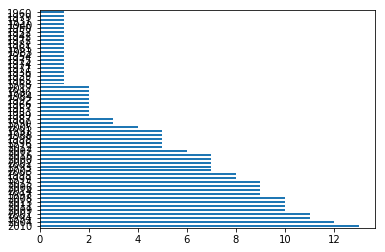

In [42]:
df['year'].value_counts().plot(kind='barh')

Aggregating & plotting time series in python

http://localhost:8888/notebooks/jupyter%20notebook/201812/20181216/%E8%B1%86%E7%93%A3%E7%94%B5%E5%BD%B1TOP250%E5%8F%AF%E8%A7%86%E5%8C%96/Untitled.ipynb

In [51]:
s = df['year'].value_counts()
s?

In [57]:
ss = s.sort_index()

In [58]:
ss.index

Index(['1931', '1936', '1939', '1940', '1942', '1950', '1952', '1953', '1954',
       '1957', '1960', '1961', '1965', '1966', '1968', '1971', '1972', '1974',
       '1975', '1979', '1982', '1983', '1984', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

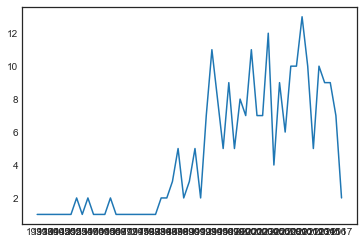

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ss)

In [60]:
ticks = ax.set_xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
# labels = ax.set_xticklabels(['one', 'two', 'three', 'four','five'],rotation=30, fontsize='small')

In [61]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

#### 折线图

https://www.jianshu.com/p/375970fd7312

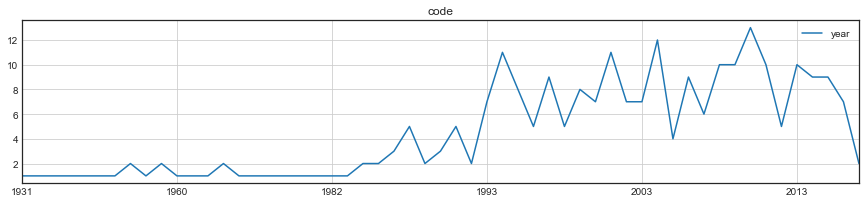

In [62]:
ss.plot(kind='line', figsize=[15,3], legend=True, title='code', grid=True)

#### 柱状图

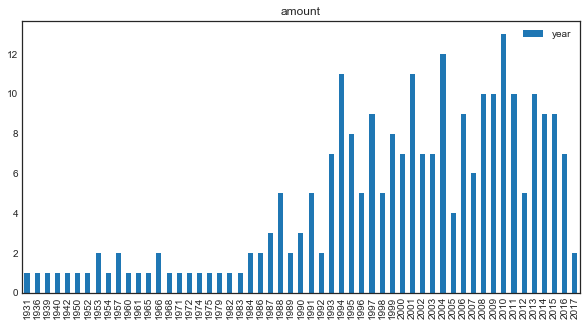

In [63]:
ss.plot(kind='bar', figsize=[10,5],  legend=True, title='amount')

### 电影上映年份分布 - 柱状图

In [197]:
df_3 = df_2.groupby(['year'])
df_3 = df_3['year'].agg(['count'])

In [198]:
df_3

,count
year,
1931,1
1936,1
1939,1
1940,1
1942,1
1950,1
1952,1
1953,2
1954,1


In [204]:
years = df_3.index.tolist()
counts = df_3['count'].tolist()

In [207]:
import pandas as pd
from pyecharts import Bar

bar = Bar("豆瓣电影TOP250-电影上映年份分布", title_pos='center', title_top='18', width=1200, height=400)
bar.add("", years, counts, is_label_show=True, is_datazoom_show=True)
bar.render('豆瓣电影TOP250上映年份分布.html')
print('html保存完成')

html保存完成


### 中外电影评分情况 - 箱式图

In [11]:
(dom1, dom2) = ([], [])
# 清洗数据,获取电影年份及国家,增加年份列及国家列
for i in range(len(df)):
    country = df.at[i, 'country']
    if country in ['中国大陆', '台湾', '香港']:
        dom1.append('中国')
    else:
        dom1.append('外国')
    dom2.append(df.at[i, 'year'])
df['country'] = dom1
df['year'] = dom2
# 获取特定数据
df1 = df.loc[df['country'] == '中国']
df2 = df.loc[df['country'] == '外国']
# 生成箱形图
boxplot = Boxplot("豆瓣电影TOP250-中外电影评分情况", title_pos='center', title_top='18', width=800, height=400)
x_axis = ['中国', '外国']
y_axis = [df1['score'], df2['score']]
_yaxis = boxplot.prepare_data(y_axis)
boxplot.add("", x_axis, _yaxis, yaxis_min=8, yaxis_max=10)
boxplot.render("豆瓣电影TOP250中外评分情况.html")
print('html保存完成')

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### 根据国家地区划分电影数TOP10

#### 设定新的DataFrame，并对国家名字进行规范，对多个国家的只取第一个

In [220]:
countries = []
for i in df['country']:
    if '(' not in i:
        country = i.split(' ')[0].strip()
    else:
        country = i[5:9]
    countries.append(country)

In [222]:
countries

['美国',
 '中国大陆',
 '法国',
 '美国',
 '意大利',
 '美国',
 '日本',
 '美国',
 '美国',
 '美国',
 '美国',
 '印度',
 '意大利',
 '法国',
 '香港',
 '美国',
 '美国',
 '美国',
 '日本',
 '韩国',
 '香港',
 '美国',
 '法国',
 '美国',
 '美国',
 '美国',
 '美国',
 '中国大陆',
 '意大利',
 '美国',
 '美国',
 '中国大陆',
 '美国',
 '美国',
 '日本',
 '美国',
 '美国',
 '香港',
 '美国',
 '印度',
 '德国',
 '日本',
 '韩国',
 '美国',
 '英国',
 '美国',
 '美国',
 '美国',
 '美国',
 '美国',
 '美国',
 '新西兰',
 '美国',
 '台湾',
 '日本',
 '韩国',
 '美国',
 '法国',
 '英国',
 '意大利',
 '伊朗',
 '美国',
 '日本',
 '美国',
 '美国',
 '意大利',
 '美国',
 '中国大陆',
 '美国',
 '西班牙',
 '法国',
 '美国',
 '美国',
 '美国',
 '中国大陆',
 '美国',
 '美国',
 '美国',
 '美国',
 '香港',
 '美国',
 '日本',
 '美国',
 '美国',
 '美国',
 '澳大利亚',
 '中国大陆',
 '日本',
 '美国',
 '香港',
 '丹麦',
 '英国',
 '美国',
 '美国',
 '美国',
 '美国',
 '美国',
 '美国',
 '日本',
 '台湾',
 '香港',
 '香港',
 '韩国',
 '美国',
 '美国',
 '巴西',
 '美国',
 '香港',
 '日本',
 '日本',
 '香港',
 '韩国',
 '日本',
 '美国',
 '美国',
 '日本',
 '日本',
 '美国',
 '美国',
 '美国',
 '韩国',
 '日本',
 '意大利',
 '日本',
 '美国',
 '香港',
 '日本',
 '美国',
 '日本',
 '美国',
 '美国',
 '韩国',
 '香港',
 '台湾',
 '美国',
 '英国',
 '日本',
 '美国',
 '美国',
 '英国'

In [223]:
df_4 = df[['title', 'year', 'country']]
df_4['country_3'] = countries
df_4

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,year,country,country_3
0,肖申克的救赎,1994,美国,美国
1,霸王别姬,1993,中国大陆 香港,中国大陆
2,这个杀手不太冷,1994,法国,法国
3,阿甘正传,1994,美国,美国
4,美丽人生,1997,意大利,意大利
5,泰坦尼克号,1997,美国,美国
6,千与千寻,2001,日本,日本
7,辛德勒的名单,1993,美国,美国
8,盗梦空间,2010,美国 英国,美国
9,机器人总动员,2008,美国,美国


#### 对国家名字进行聚合

In [224]:
df_temp = df_4.groupby(['country_3'])
df_country = df_temp['country_3'].agg(['count'])
df_country

,count
country_3,
中国大陆,12
丹麦,1
伊朗,2
印度,4
台湾,4
巴西,1
德国,5
意大利,8
新西兰,1


#### 对各个国家的电影数进行排序

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [230]:
df_country = df_country.sort_values(by=['count'], ascending=False)

In [231]:
df_country

,count
country_3,
美国,122
日本,31
香港,19
英国,15
中国大陆,12
法国,11
韩国,8
意大利,8
德国,5


#### 生成柱状图

In [232]:
# 生成柱状图
country_lis = df_country.index
country_counts = df_country['count']
bar = Bar("豆瓣电影TOP250-国家/地区电影数TOP10", title_pos='center', title_top='18', width=800, height=400)
bar.add("", country_lis, country_counts, is_convert=True, xaxis_min=0, yaxis_label_textsize=12, is_yaxis_boundarygap=True, yaxis_interval=0, is_label_show=True, is_legend_show=False, label_pos='right', is_yaxis_inverse=True, is_splitline_show=False)
bar.render("豆瓣电影TOP250国家地区TOP10.html")

### 电影评分分布

#### 设定新的评分数据框

In [233]:
df_5 = df[['title', 'year', 'score']]
df_temp = df_5.groupby(['score'])
df_score = df_temp['score'].agg(['count'])
df_score

,count
score,
8.3,5
8.4,6
8.5,25
8.6,33
8.7,47
8.8,39
8.9,22
9.0,19
9.1,21


#### 生成电影评分柱状图

In [235]:
# 生成柱状图
score = df_score.index
score_counts = df_score['count']
bar = Bar("豆瓣电影TOP250-电影评分分布", title_pos='center', title_top='18', width=800, height=400)
bar.add("", score, score_counts, is_stack=True, is_label_show=True, yaxis_max=60)
bar.render("豆瓣电影TOP250评分分布.html")

### 评论人数TOP10

#### 设立新的数据框

In [241]:
df_6 = df[['title', 'year', 'people']]
df_6['people'] = [i[:-3] for i in df_6.people]
df_people = df_6
df_people

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,year,people
0,肖申克的救赎,1994,1229537
1,霸王别姬,1993,905093
2,这个杀手不太冷,1994,1130701
3,阿甘正传,1994,969496
4,美丽人生,1997,566483
5,泰坦尼克号,1997,905215
6,千与千寻,2001,897736
7,辛德勒的名单,1993,508905
8,盗梦空间,2010,984456
9,机器人总动员,2008,653386


#### 根据评论人数排序

In [243]:
df_people = df_people.sort_values(by='people', ascending=False)
df_people

,title,year,people
8,盗梦空间,2010,984456
244,勇士,2011,97898
3,阿甘正传,1994,969496
151,无人知晓,2004,95745
194,追随,1998,94974
123,七武士,1954,94604
5,泰坦尼克号,1997,905215
1,霸王别姬,1993,905093
6,千与千寻,2001,897736
11,三傻大闹宝莱坞,2009,881731


In [244]:
df_people[:10]

,title,year,people
8,盗梦空间,2010,984456
244,勇士,2011,97898
3,阿甘正传,1994,969496
151,无人知晓,2004,95745
194,追随,1998,94974
123,七武士,1954,94604
5,泰坦尼克号,1997,905215
1,霸王别姬,1993,905093
6,千与千寻,2001,897736
11,三傻大闹宝莱坞,2009,881731


#### 生成柱状图

In [245]:
# 生成柱状图
titles = df_people[:10].title
peoples = df_people[:10].people
bar = Bar("豆瓣电影TOP250-评论人数TOP10", title_pos='center', title_top='18', width=800, height=400)
bar.add("", titles, peoples, is_convert=True, xaxis_min=700000, yaxis_rotate=0, yaxis_label_textsize=10, is_yaxis_boundarygap=True, yaxis_interval=0, is_label_show=True, is_legend_show=False, label_pos='right', is_yaxis_inverse=True, is_splitline_show=False)
bar.render("豆瓣电影TOP250评论人数TOP10.html")

### 排名评分人数三维度

#### 生成新的数据框

In [254]:
df_7 = df[['title', 'rank', 'score', 'people']]
df_7['people'] = [i[:-3] for i in df_7.people]
df_7

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,rank,score,people
0,肖申克的救赎,1,9.6,1229537
1,霸王别姬,2,9.6,905093
2,这个杀手不太冷,3,9.4,1130701
3,阿甘正传,4,9.4,969496
4,美丽人生,5,9.5,566483
5,泰坦尼克号,6,9.3,905215
6,千与千寻,7,9.3,897736
7,辛德勒的名单,8,9.5,508905
8,盗梦空间,9,9.3,984456
9,机器人总动员,10,9.3,653386


#### 生成数据列表

In [259]:
rank_lis = df_7['rank'].tolist()  # 排名
score_lis = df_7['score'].tolist()  # 评分
people_lis = df_7['people'].tolist()  # 评论人数

#### 生成维度图

In [260]:
import pandas as pd
from pyecharts import Scatter
sc = Scatter("豆瓣电影TOP250-排名评分人数三维度", title_pos='center', title_top='5', width=800, height=400)
sc.add("", rank_lis, score_lis, yaxis_max=9.7, yaxis_min=8.2, extra_data=people_lis, is_visualmap=True, visual_dimension=2, visual_orient="horizontal", visual_type="size", visual_range=[50000, 1300000], visual_text_color="#000", visual_range_size=[5, 30])
sc.render('豆瓣电影TOP250排名三维度.html')

### 年份评分人数三维度

#### 生成新的数据框

In [261]:
df_8 = df[['title', 'year', 'score', 'people']]
df_8['people'] = [i[:-3] for i in df_8.people]

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [262]:
temp_years = []
for _ in df_8.year:
    if len(_)>4:
        _ = _[:4]
    temp_years.append(_)
df_8['year'] = temp_years

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 生成数据列表

In [264]:
# 生成电影年份列表
year_lis = df_8['year'].tolist()  # 上映年代列表
# 生成电影评分列表
score_lis = df_8['score'].tolist()  # 评分
# 生成电影评价人数列表
people_lis = df_8['people'].tolist()  # 评论人数

#### 生成维度图

In [265]:

# 生成数据列表
data = [list(i) for i in zip(dom1, dom2, dom3)]
# 生成散点图
x_lst = [v[0] for v in data]
y_lst = [v[1] for v in data]
extra_data = [v[2] for v in data]
sc = Scatter("豆瓣电影TOP250-年份评分人数三维度", title_pos='center', title_top='5', width=800, height=400)
sc.add("", year_lis, score_lis, yaxis_max=9.7, yaxis_min=8.2, xaxis_max=1930, xaxis_min=2018, extra_data=people_lis, is_visualmap=True, visual_dimension=2, visual_orient="horizontal", visual_type="size", visual_range=[50000, 1300000], visual_text_color="#000", visual_range_size=[5, 30])
sc.render('豆瓣电影TOP250年份三维度.html')

### 电影类型树形图Treemap

#### 构造新的数据框

In [2]:
import pandas as pd
from pyecharts import TreeMap

# 读取文件
df_origin = pd.read_csv('douban_top_250.csv', encoding='gb18030')
(dom1, dom2, dom3, dom4) = ([], [], [], [])
df_9 = df_origin[['rank', 'title', 'score', 'typ', 'people']]

#### 清洗掉异常数据

In [4]:
s = [i.split(' ') for i in df_9['typ']]
sum_s = sum(s, [])
sum_s.remove('1978(中国大陆)')  # 移除电影类型里的异常数据
types = list(set(sum_s))
types

['动画',
 '爱情',
 '历史',
 '冒险',
 '音乐',
 '喜剧',
 '奇幻',
 '儿童',
 '剧情',
 '情色',
 '恐怖',
 '战争',
 '歌舞',
 '武侠',
 '运动',
 '传记',
 '家庭',
 '西部',
 '同性',
 '悬疑',
 '古装',
 '动作',
 '惊悚',
 '灾难',
 '犯罪',
 '科幻',
 '纪录片']

#### 统计列表元素个数返回字典

In [5]:
import numpy as np
from collections import Counter

def all_list(arr):
    result = {}
    for i in set(arr):
        result[i] = arr.count(i)
    return result

In [6]:
type_dic = all_list(sum_s)
type_dic

{'传记': 15,
 '儿童': 3,
 '冒险': 46,
 '剧情': 193,
 '动作': 30,
 '动画': 33,
 '历史': 12,
 '古装': 6,
 '同性': 7,
 '喜剧': 46,
 '奇幻': 32,
 '家庭': 24,
 '恐怖': 2,
 '悬疑': 32,
 '情色': 1,
 '惊悚': 36,
 '战争': 19,
 '歌舞': 5,
 '武侠': 3,
 '灾难': 1,
 '爱情': 57,
 '犯罪': 44,
 '科幻': 24,
 '纪录片': 4,
 '西部': 4,
 '运动': 2,
 '音乐': 7}

#### 排序

In [7]:
sort_num = sorted(type_dic.items(),key=lambda x:x[1],reverse=True)
print(sort_num)

[('剧情', 193), ('爱情', 57), ('冒险', 46), ('喜剧', 46), ('犯罪', 44), ('惊悚', 36), ('动画', 33), ('奇幻', 32), ('悬疑', 32), ('动作', 30), ('家庭', 24), ('科幻', 24), ('战争', 19), ('传记', 15), ('历史', 12), ('音乐', 7), ('同性', 7), ('古装', 6), ('歌舞', 5), ('西部', 4), ('纪录片', 4), ('儿童', 3), ('武侠', 3), ('恐怖', 2), ('运动', 2), ('情色', 1), ('灾难', 1)]


#### 构造数据

标准数据格式：类似字典{"value": i[1],"name": i[0]}，注意key为"name"，"value"

In [8]:
data = [{"value": i[1],"name": i[0]} for i in sort_num]
data

[{'name': '剧情', 'value': 193},
 {'name': '爱情', 'value': 57},
 {'name': '冒险', 'value': 46},
 {'name': '喜剧', 'value': 46},
 {'name': '犯罪', 'value': 44},
 {'name': '惊悚', 'value': 36},
 {'name': '动画', 'value': 33},
 {'name': '奇幻', 'value': 32},
 {'name': '悬疑', 'value': 32},
 {'name': '动作', 'value': 30},
 {'name': '家庭', 'value': 24},
 {'name': '科幻', 'value': 24},
 {'name': '战争', 'value': 19},
 {'name': '传记', 'value': 15},
 {'name': '历史', 'value': 12},
 {'name': '音乐', 'value': 7},
 {'name': '同性', 'value': 7},
 {'name': '古装', 'value': 6},
 {'name': '歌舞', 'value': 5},
 {'name': '西部', 'value': 4},
 {'name': '纪录片', 'value': 4},
 {'name': '儿童', 'value': 3},
 {'name': '武侠', 'value': 3},
 {'name': '恐怖', 'value': 2},
 {'name': '运动', 'value': 2},
 {'name': '情色', 'value': 1},
 {'name': '灾难', 'value': 1}]

#### 矩形树图Treemap

http://pyecharts.org/#/zh-cn/charts_base?id=treemap%EF%BC%88%E7%9F%A9%E5%BD%A2%E6%A0%91%E5%9B%BE%EF%BC%89

In [9]:
treemap = TreeMap("豆瓣电影TOP250-电影类型图", title_pos='center', title_top='5', width=800, height=400)
treemap.add('电影类型', data, is_label_show=True, label_pos='inside', is_legend_show=False)
treemap.render('豆瓣电影TOP250电影类型图.html')
print('ok')

ok
